In [69]:

import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('data/Position_Salaries.csv')
dataset.head

<bound method NDFrame.head of             Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000>

In [70]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [71]:
X = dataset.iloc[:,1:2].values.astype('float')
y = dataset.iloc[:,2:3].values.astype('float')
X, y

(array([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]]),
 array([[  45000.],
        [  50000.],
        [  60000.],
        [  80000.],
        [ 110000.],
        [ 150000.],
        [ 200000.],
        [ 300000.],
        [ 500000.],
        [1000000.]]))

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

(X,y)

(array([[-1.5666989 ],
        [-1.21854359],
        [-0.87038828],
        [-0.52223297],
        [-0.17407766],
        [ 0.17407766],
        [ 0.52223297],
        [ 0.87038828],
        [ 1.21854359],
        [ 1.5666989 ]]),
 array([[-0.72004253],
        [-0.70243757],
        [-0.66722767],
        [-0.59680786],
        [-0.49117815],
        [-0.35033854],
        [-0.17428902],
        [ 0.17781001],
        [ 0.88200808],
        [ 2.64250325]]))

In [73]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/Users/bruno/miniconda3/envs/metal/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

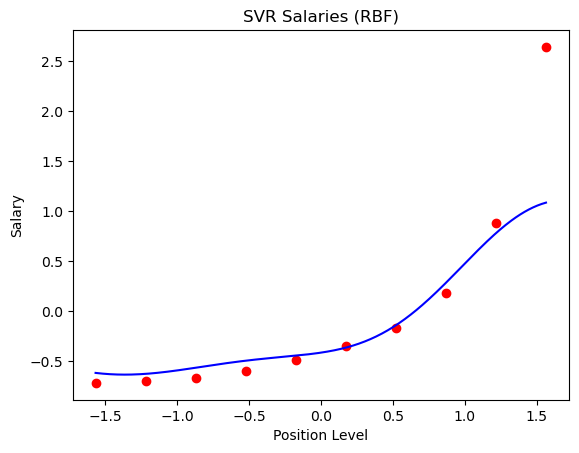

In [74]:
import numpy as np

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('SVR Salaries (RBF)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()